### 신경망 모델

In [1]:
from IPython.display import display

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd

import mglearn

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()


import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() =='Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Text(0, 0.5, 'relu(x), tanh(x)')

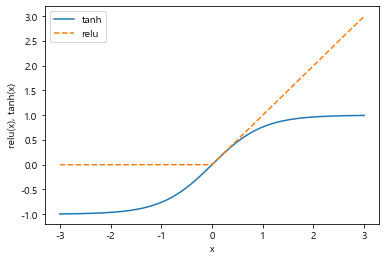

In [6]:
line = np.linspace(-3,3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), linestyle = '--', label ='relu')
plt.legend(loc ='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

### 신경망 튜닝

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

In [11]:
X, y = make_moons(n_samples =100, noise=0.25, random_state =3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state=42)

Text(0, 0.5, '특성 1')

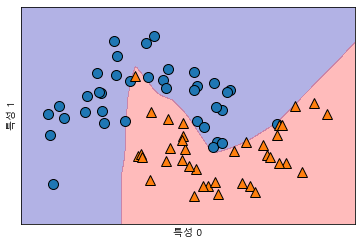

In [14]:
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha =.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

Text(0.5, 0, '특성 1')

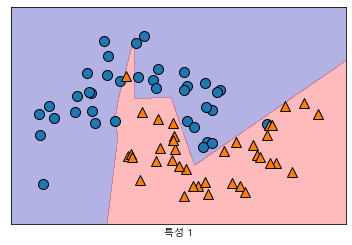

In [17]:
mlp = MLPClassifier(solver = 'lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill =True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.xlabel('특성 1')

Text(0, 0.5, '특성 1')

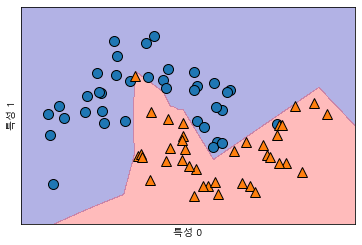

In [19]:
# 10개의 유닛으로 된 두개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state = 0, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha =.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

In [20]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층

Text(0, 0.5, '특성 1')

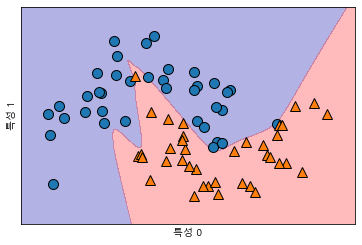

In [21]:
mlp = MLPClassifier(solver = 'lbfgs', activation='tanh', random_state=0, hidden_layer_sizes = [10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill =True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

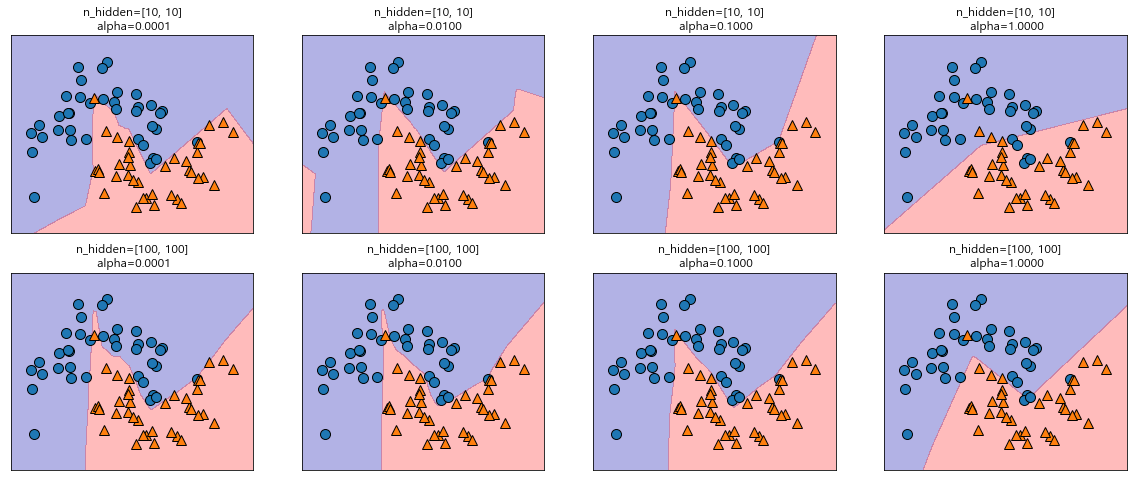

In [28]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01,0.1,1]):
        mlp = MLPClassifier(solver ='lbfgs', random_state =0, 
                            hidden_layer_sizes = [n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha =.3, ax= ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax= ax)
        ax.set_title('n_hidden=[{}, {}]\n alpha={:.4f}'.format(
                  n_hidden_nodes, n_hidden_nodes, alpha))

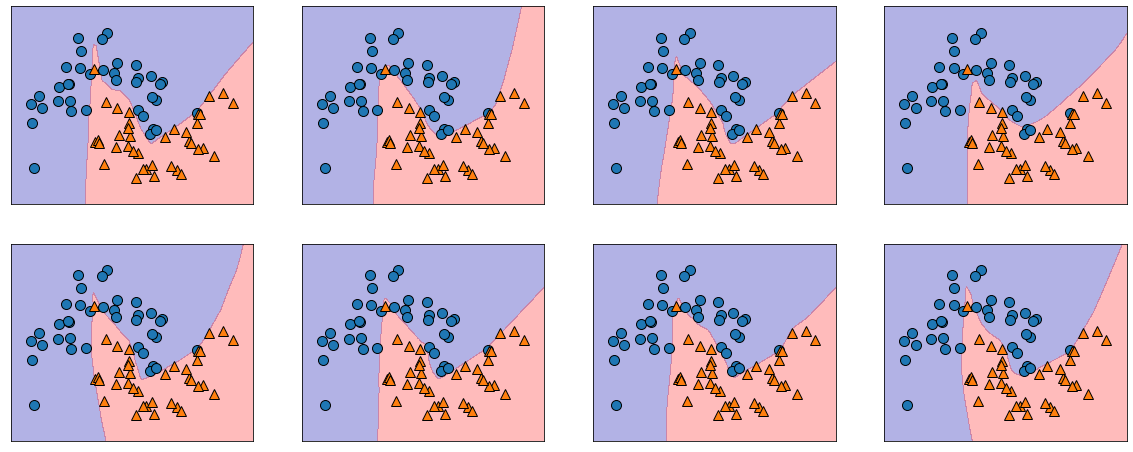

In [31]:
fig, axes = plt.subplots(2, 4, figsize = (20,8))
for i, ax in enumerate(axes.ravel()):
    mlp= MLPClassifier(solver = 'lbfgs', random_state =i,
                      hidden_layer_sizes = [100,100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha =.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)

In [32]:
print('유방암 데이터의 특성별 최댓값:\n', cancer.data.max(axis=0))

유방암 데이터의 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state =42)
mlp.fit(X_train, y_train)

print('훈런 세트 정확도:{:.2f}'.format(mlp.score(X_train, y_train)))
print('테스트 세트 정확도:{:.2f}'.format(mlp.score(X_test,y_test)))

훈런 세트 정확도:0.94
테스트 세트 정확도:0.92


In [35]:
# 훈련 세트 각 특성의 평균을 계산한다.
mean_on_train = X_train.mean(axis =0)
# 훈련 세트 각 특성의 표준 편차를 계산한다.
std_on_train = X_train.std(axis =0)

In [37]:
#데이터에서 평균을 빼고 표준 편차로 나누면
#평균 0, 표준 편차 1인 데이터로 변환 된다.
X_train_scaled = (X_train - mean_on_train) /std_on_train
#(훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 한다.
X_test_scaled = (X_test - mean_on_train) /std_on_train

mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train_scaled, y_train)

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [38]:
print('훈련 세트 정확도:{:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도:{:.3f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도:0.991
테스트 세트 정확도:0.965


In [41]:
mlp = MLPClassifier(max_iter=1000, random_state = 0)
mlp.fit(X_train_scaled, y_train)

print('훈련 세트 정확도:{:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도:{:.3f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.972


In [42]:
mlp =MLPClassifier(max_iter=1000, alpha =1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('훈련세트 정확도:{:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트세트 정확도:{:.3f}'.format(mlp.score(X_test_scaled, y_test)))

훈련세트 정확도:0.988
테스트세트 정확도:0.972


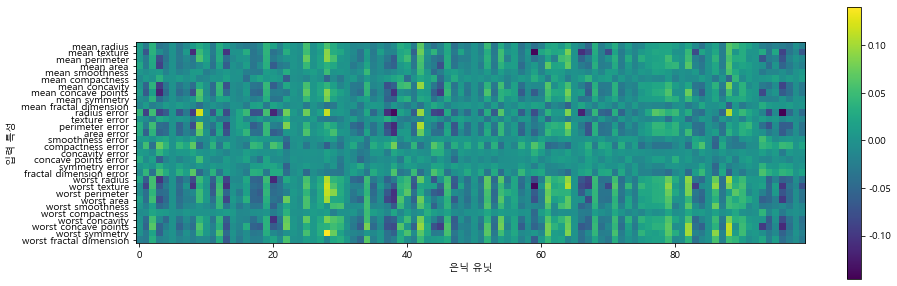

In [49]:
plt.figure(figsize=(15,5))
plt.imshow(mlp.coefs_[0], interpolation = 'none', cmap = 'viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.colorbar()